In [1]:
import pandas as pd

customer = pd.read_csv("data/1ch/customer_master.csv")
item = pd.read_csv("data/1ch/item_master.csv")
transaction1 = pd.read_csv("data/1ch/transaction_1.csv")
transaction2 = pd.read_csv("data/1ch/transaction_2.csv")
transaction_d1 = pd.read_csv("data/1ch/transaction_detail_1.csv")
transaction_d2 = pd.read_csv("data/1ch/transaction_detail_2.csv")

In [2]:
transaction = pd.concat([transaction1, transaction2], ignore_index=True)
print(transaction.shape)

(6786, 4)


In [3]:
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [4]:
transaction_detail = pd.concat([transaction_d1, transaction_d2], ignore_index=True)

In [5]:
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [6]:
print(transaction.columns)

Index(['transaction_id', 'price', 'payment_date', 'customer_id'], dtype='object')


In [7]:
print(transaction_detail.columns)

Index(['detail_id', 'transaction_id', 'item_id', 'quantity'], dtype='object')


In [8]:
trans_sum = pd.merge(transaction, transaction_detail, on="transaction_id", how="outer")
trans_sum.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


In [9]:
print(customer.columns)

Index(['customer_id', 'customer_name', 'registration_date', 'email', 'gender',
       'age', 'birth', 'pref'],
      dtype='object')


In [10]:
print(trans_sum.columns)

Index(['transaction_id', 'price', 'payment_date', 'customer_id', 'detail_id',
       'item_id', 'quantity'],
      dtype='object')


In [11]:
trans_sum2 = pd.merge(customer, trans_sum, on="customer_id")

In [12]:
print(trans_sum2.columns)

Index(['customer_id', 'customer_name', 'registration_date', 'email', 'gender',
       'age', 'birth', 'pref', 'transaction_id', 'price', 'payment_date',
       'detail_id', 'item_id', 'quantity'],
      dtype='object')


In [13]:
trans_sum2.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref,transaction_id,price,payment_date,detail_id,item_id,quantity
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시,T0000000381,210000,2019-02-08 07:31:14,278,S005,1
1,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시,T0000002879,120000,2019-04-14 23:23:23,2904,S003,1
2,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시,T0000003093,240000,2019-04-20 20:02:00,3129,S003,2
3,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시,T0000000533,85000,2019-02-11 23:14:31,439,S002,1
4,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시,T0000001866,330000,2019-03-19 08:19:59,1844,S003,1


In [14]:
print(item.columns)

Index(['item_id', 'item_name', 'item_price'], dtype='object')


In [15]:
complete = pd.merge(trans_sum2, item, on="item_id")
complete.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref,transaction_id,price,payment_date,detail_id,item_id,quantity,item_name,item_price
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시,T0000000381,210000,2019-02-08 07:31:14,278,S005,1,PC-E,210000
1,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시,T0000002879,120000,2019-04-14 23:23:23,2904,S003,1,PC-C,120000
2,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시,T0000003093,240000,2019-04-20 20:02:00,3129,S003,2,PC-C,120000
3,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시,T0000000533,85000,2019-02-11 23:14:31,439,S002,1,PC-B,85000
4,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시,T0000001866,330000,2019-03-19 08:19:59,1844,S003,1,PC-C,120000


In [16]:
complete["payment_date"] = pd.to_datetime(complete["payment_date"])
complete["payment_month"] = complete["payment_date"].dt.strftime("%Y%m")

In [17]:
complete[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-08 07:31:14,201902
1,2019-04-14 23:23:23,201904
2,2019-04-20 20:02:00,201904
3,2019-02-11 23:14:31,201902
4,2019-03-19 08:19:59,201903


In [18]:
complete.groupby("payment_month").price.sum()

payment_month
201902    179190000
201903    175375000
201904    176720000
201905    171385000
201906    183395000
201907    188685000
Name: price, dtype: int64

In [19]:
complete.groupby("payment_month").age.mean()

payment_month
201902    50.926976
201903    49.954276
201904    50.038851
201905    49.739316
201906    50.806988
201907    50.130330
Name: age, dtype: float64

In [20]:
complete.groupby("payment_month").age.count()

payment_month
201902    1164
201903    1181
201904    1184
201905    1170
201906    1202
201907    1243
Name: age, dtype: int64

In [21]:
complete.groupby("payment_month").count().age

payment_month
201902    1164
201903    1181
201904    1184
201905    1170
201906    1202
201907    1243
Name: age, dtype: int64

In [22]:
complete.columns

Index(['customer_id', 'customer_name', 'registration_date', 'email', 'gender',
       'age', 'birth', 'pref', 'transaction_id', 'price', 'payment_date',
       'detail_id', 'item_id', 'quantity', 'item_name', 'item_price',
       'payment_month'],
      dtype='object')

In [23]:
tmp = complete[["age", "price", "payment_month", "quantity", "item_name", "item_price"]]

In [24]:
tmp.groupby(["payment_month", "item_name"]).sum()[["age", "quantity"]]

age  quantity
payment_month item_name                 
201902        PC-A       17274       483
              PC-B       11928       297
              PC-C        7727       165
              PC-D        8377       173
              PC-E       13973       285
201903        PC-A       18300       520
              PC-B       12084       300
              PC-C        7178       159
              PC-D        6719       143
              PC-E       14715       305
201904        PC-A       18198       518
              PC-B       10926       276
              PC-C        8203       183
              PC-D        6340       135
              PC-E       15579       309
201905        PC-A       18040       497
              PC-B       12080       298
              PC-C        7466       171
              PC-D        6913       144
              PC-E       13696       280
201906        PC-A       18426       520
              PC-B       11613       282
              PC-C        8644       182
              PC-D        7195       160
              PC-E       15192       302
201907        PC-A       17941       505
              PC-B       13591       332
              PC-C        7060       162
              PC-D        6851       145
              PC-E       16869       341

In [25]:
pd.pivot_table(complete, index="payment_month", columns="item_name", values=["price", "quantity"], aggfunc='min')

price                                quantity                 \
item_name       PC-A   PC-B    PC-C    PC-D    PC-E     PC-A PC-B PC-C PC-D   
payment_month                                                                 
201902         50000  85000  120000  180000  210000        1    1    1    1   
201903         50000  85000  120000  180000  210000        1    1    1    1   
201904         50000  85000  120000  180000  210000        1    1    1    1   
201905         50000  85000  120000  180000  210000        1    1    1    1   
201906         50000  85000  120000  180000  210000        1    1    1    1   
201907         50000  85000  120000  180000  210000        1    1    1    1   

                    
item_name     PC-E  
payment_month       
201902           1  
201903           1  
201904           1  
201905           1  
201906           1  
201907           1

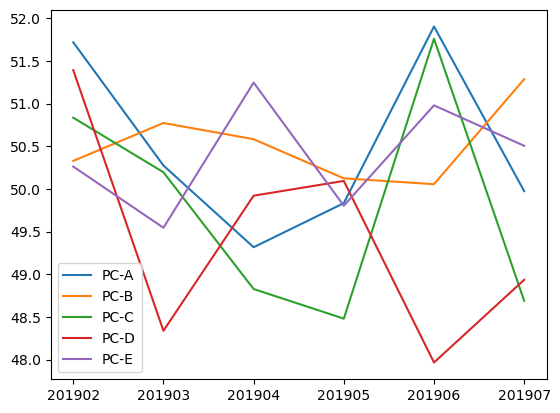

In [26]:
from matplotlib import pyplot as plt

# Create a graph data
graph_data = pd.pivot_table(complete, index="payment_month", columns="item_name", values="age", aggfunc='mean')

# Draw a Data for each item_name
for item_name in graph_data.columns:
    plt.plot(list(graph_data.index), graph_data[item_name], label=item_name)

plt.legend()